<a href="https://colab.research.google.com/github/7Blessings7/Final-Project-CMS204/blob/main/Pair_02_Code_Avelino_Edgardo_Moses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Edgardo Moses Ezekiel Averilla 

2022-30084

CMSC204

Pair-2

Hello there! This is a python notebook exploring the graph data structure and implementation of Dijkstra's Algorithm for solving the shortest path. 




# Statement of the Problem:

My father is a business owner that delivers goods to his customers usually on a weekly basis but sometimes upon requests of orders. To save cost, he is the one delivering the goods himself. With the rising cost of gas, my father must be efficient in selecting the path he will take everytime he will be delivering his goods. **This project will show a solution on how to select paths efficiently by using graph data structures and Dijkstra's Algorithm.**

# Solution:

The program below will be the solution to this problem. It will demonstrate:



1.   The graph data structure
2.   Implementation of Dijkstra's Algorithm

The solution will be divided into different chapters namely:



1.   The Delivery Route - This is where the routes are defined
2.   Graphical Representation - This is where the routes are represented in a graphical manner
3.   Dijkstra's Algorithm - This is where we implement Dijkstra's Algorithm
4.   Final Output - This will show the shortest path to take





# Delivery Route

The photo below is the routes that my father uses when he is delivering his goods. The first step is to convert this into python dictionaries. The places will serve as the node and the distances as edges (weighted). Once it is converted to python dictionaries we can plot it to visualize it as graphs. 



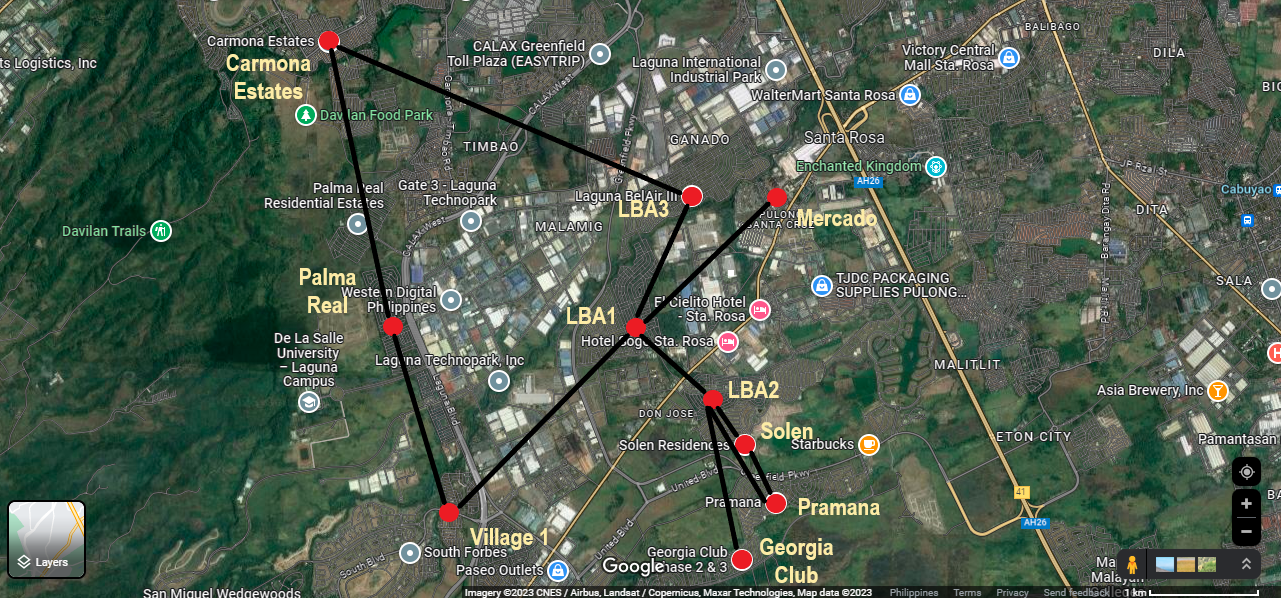

In [ ]:
delivery_route = {

	'LBA2': {'LBA1': 1000, 'Solen Residences': 2500, 'Pramana': 2800, 'Georgia Club': 14600},
	'LBA1': {'LBA2': 1000, 'LBA3': 1500, 'Mercado Village': 1800, 'Village1': 3300},
	'LBA3': {'LBA1': 1500, 'Carmona Estates': 16000},
	'Mercado Village': {'LBA1': 1800},
	'Solen Residences': {'LBA2': 2500, 'Pramana': 1000},
	'Pramana': {'LBA2': 2800, 'Solen Residences': 1000},
	'Georgia Club': {'LBA2': 14600},
	'Village1': {'LBA1': 3300, 'Palma Real': 2800},
	'Palma Real': {'Village1': 2800, 'Carmona Estates': 10600},
	'Carmona Estates': {'Palma Real': 10600, 'LBA3': 16000},

}

delivery_route

{'LBA2': {'LBA1': 1000,
  'Solen Residences': 2500,
  'Pramana': 2800,
  'Georgia Club': 14600},
 'LBA1': {'LBA2': 1000,
  'LBA3': 1500,
  'Mercado Village': 1800,
  'Village1': 3300},
 'LBA3': {'LBA1': 1500, 'Carmona Estates': 16000},
 'Mercado Village': {'LBA1': 1800},
 'Solen Residences': {'LBA2': 2500, 'Pramana': 1000},
 'Pramana': {'LBA2': 2800, 'Solen Residences': 1000},
 'Georgia Club': {'LBA2': 14600},
 'Village1': {'LBA1': 3300, 'Palma Real': 2800},
 'Palma Real': {'Village1': 2800, 'Carmona Estates': 10600},
 'Carmona Estates': {'Palma Real': 10600, 'LBA3': 16000}}

# Graphical Representation

Using python libraries networkx and matplotlib to transform or convert the dictionary 'delivery_route' into graph

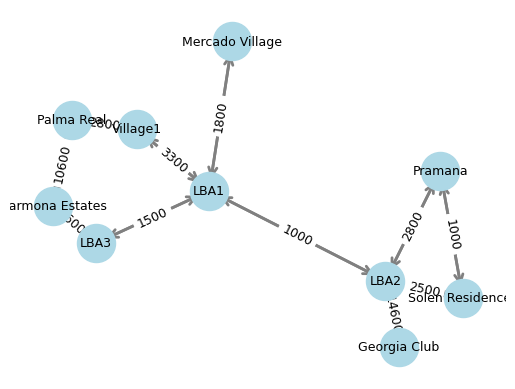

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for node in delivery_route:
    G.add_node(node)
for node, edges in delivery_route.items():
    for edge, weight in edges.items():
        G.add_edge(node, edge, weight=weight)

pos = nx.spring_layout(G, seed=200, scale=25)
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx_nodes(G, pos, node_size=750, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=2, arrows=True, arrowstyle='->', arrowsize=15, edge_color='grey')
nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_family='sans-serif')

plt.axis('off')
plt.show()



# Dijkstra's Algorithm

Dijkstra's algorithm is a shortest path algorithm that calculates the shortest path between two nodes in a weighted graph. The algorithm uses a priority queue to maintain the distances of nodes from the source node and iteratively finds the shortest path to all nodes in the graph. The shortest path to a node is updated if a new shorter path is found, and the algorithm terminates when all nodes have been visited or the destination node has been reached.

In [ ]:
import heapq

def dijkstra(graph, start):
    # Initially set the starting distance to zero and all distances to infinity
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    
    # Will be using heap here to track the nodes with the shortest distance from the starting node
    heap = [(0, start)]
    
    while heap:
        # Pop the node with the shortest distance
        (current_distance, current_node) = heapq.heappop(heap)
        
        # Let's compare the current distance of the current node to the distance we already know
        # Skip the node if current distance is greater than the distance we already know
        if current_distance > distances[current_node]:
            continue
        
        # This will update the distance to all neigbhors
        for neighbor, distance in graph[current_node].items():
            new_distance = distances[current_node] + distance
            
            # Let's compare the new distance to the current distance
            # If the new distance to the neighbor is shorter than the current distance, update the distance
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                
                # Let's Add the neighbor to the heap with the new shortest distance we got
                heapq.heappush(heap, (new_distance, neighbor))
    
    return distances


In [ ]:
def shortest_path(graph, start, end):

    distances = dijkstra(graph, start)
    
    # Trace back from the destination node to the starting node to find the shortest path
    path = [end]
    while path[-1] != start:
        predecessor = min(graph[path[-1]].items(), key=lambda x: distances[x[0]] + x[1])[0]
        path.append(predecessor)
    path.reverse()
    
    return path


# Final Output

The user will be asked to enter a starting node or place and an ending node or place. It will be then run through the program and will determine the shortest path to take.

In [ ]:
start_node = input("Enter start node: ")
end_node = input("Enter end node: ")

path = shortest_path(delivery_route, start_node, end_node)

print("The shortest path to take is: ")
print(' -> '.join(path))


Enter start node: LBA2
Enter end node: Carmona Estates
The shortest path to take is: 
LBA2 -> LBA1 -> Village1 -> Palma Real -> Carmona Estates


# Thank you! 

Also I want to share with you the links for the video presentation:

youtube: https://youtu.be/OuUNLlrk86o

Google Drive: https://drive.google.com/file/d/1Ef2nsYZmCVoXzGQ_mybGyC3wLYnfdOCJ/view?usp=share_link

